In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys, os
from matplotlib import pyplot
import pandas as pd
import numpy as np
import keras
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
from PIL import Image
from numpy import asarray

Using TensorFlow backend.


In [0]:
# Reading data
df=pd.read_csv('/content/gdrive/My Drive/data/fer2013.csv')

In [0]:
df.head(3)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training


In [0]:
X_train,train_y,X_test,test_y=[],[],[],[]
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [0]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 30
width, height = 48, 48


X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [0]:
train_y[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

In [0]:
X_train.shape[0]

28709

In [0]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [0]:
##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# check point path
checkpoint_path_3 = "/content/gdrive/My Drive/data/emotion_recognition_weights/erw.ckpt"
# Create checkpoint callback and store the best weights alone, discard updating the weights if the 'acc' does not improve
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path_3,monitor='val_acc',
                                                 save_weights_only=True, save_best_only=True,
                                                 verbose=1)

In [0]:
#Compliling the model
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
# Loading trained weights
model.load_weights('/content/gdrive/My Drive/data/fer.h5')
#Training the model
model.fit(X_train, train_y,batch_size=batch_size,epochs=1,verbose=1,validation_data=(X_test, test_y),
         shuffle=True,callbacks=[cp_callback])









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 28709 samples, validate on 3589 samples
Epoch 1/1
28709/28709 [==============================] - 529s 18ms/step - loss: 0.3300 - acc: 0.8944 - val_loss: 1.9038 - val_acc: 0.5790

Epoch 00001: val_acc improved from -inf to 0.57899, saving model to /content/gdrive/My Drive/data/emotion_recognition_weights/erw.ckpt


In [0]:
test_img=cv2.imread('/content/gdrive/My Drive/data/5-celebrity-faces-dataset/data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg')

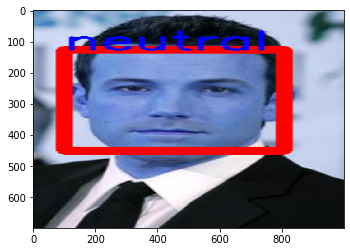

In [0]:
gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

face_haar_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Realtime-Emotion-Detection-master/haarcascade_frontalface_default.xml')
faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


for (x,y,w,h) in faces_detected:
    cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
    roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
    roi_gray=cv2.resize(roi_gray,(48,48))
    img_pixels = asarray(roi_gray)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels = img_pixels/255
    img_pixels = img_pixels.reshape(1,48, 48, -3)
    predictions = model.predict(img_pixels)
 #find max indexed array
max_index = np.argmax(predictions[0])

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
predicted_emotion = emotions[max_index]

cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

resized_img = cv2.resize(test_img, (1000, 700))
#cv2.imshow('Facial emotion analysis ',resized_img)
resized_img=asarray(resized_img)
pyplot.imshow(resized_img)

In [0]:
# Face posiiton
faces_detected

array([[ 16,  45, 116, 116]], dtype=int32)